<a href="https://colab.research.google.com/github/tpcorreia/MyNotes_Bizu/blob/EDA/EDA_Adult_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

The "Adult Dataset", also known as the "Cenus Income" dataset is from the 1994 Census Database. The Census is a wide-range activity, which takes place once a decade in the entire country. It is a procedure that acquires complete and reliable information such as demographic, social and economic characteristics about people in a given population. The data collected includes age, gender, marital-status, country of origin, employment, education, etc.

The census includes over 200 different surveys taken by a lot of enumerators to get reliable measure about demographics of American people. The most important role of Census is to calculate population distribution. The information makes it possible to plan better services, improve the quality of life of people and solve existing problems. The data was extracted by Barry Becker from 1994 Census Database by collecting clean records using a set of conditions. Each row represents all the data about a specific person, and it could be used to analyze a variety of problems including and not limited to demographic status(using finalwgt, age, gender, country of origin), social and economic status(education and employment related data), etc.

# Data Understanding

Age: This attribute tells us about the age of any individual. It is a numerical attribute with continuous values, and since it is an interval variable where zero measurement indicates, there's no/zero age, it is a Ratio attribute.

WorkClass: This attribute tells us about the individual work class of any individual. It is a categorical attribute, with different values like private, federal-gov, local-gov, state-gov, etc. It is a Nominal attribute since each value is distinct and has some meaning attached to it.

FnlWgt: This attribute is used to independent estimates of civilian noninstitutional population of the US. People with similar demographic features should have similar weights. It is a numerical attribute with continuous values, and since it is an interval variable where zero measurement is not possible and means no final weight, it is a Ratio attribute.

Education: This attribute tells us about the highest education level of any individual. It is a categorical attribute, with different values like Bachelors, Preschool, Masters, Doctorate, etc. It is a Nominal attribute since each value is distinct and has some meaning attached to it.

Education-num: This attribute is a numerical representation of the education attribute, indicating the highest education level of any individual. The higher the value, the higher the education level. It is an Ordinal attribute since each value is distinct and has some order in it, the higher the value, the higher the education level.

Marital-Status: This attribute tells us about the marital status of an individual. It is a categorical attribute, with different values like Married-civ-spouse, Divorced, Never-married, etc. It is a Nominal attribute since each value is distinct and has some meaning attached to it.

Occupation: This attribute tells us about the field of occupation of an individual. It is a categorical attribute, with different values like Tech-Support, Craft-repair, Sales, etc. It is a Nominal attribute since each value is distinct and has some meaning attached to it.

Relationship: This attribute tells us about individual's relation in a family. It is a categorical attribute, with different values like Wife, Husband, Unmarried, etc. It is a Nominal attribute since each value is distinct and has some meaning attached to it.

Race: This attribute tells us about the race of an individual. It is a categorical attribute, with different values like White, Black, Asian-Pac-Islander, etc. It is a Nominal attribute since each value is distinct and has some meaning attached to it.

Sex: This attribute tells us about the sex/gender of an individual. It is a categorical attribute, with two values Male, Female. It is a Nominal attribute since each value is distinct and has some meaning attached to it.

Capital-Gain: This attribute tells us the gain/income from investment sources other than salary. It is a numerical attribute with continuous values, since it is an interval variable where zero measurement means no capital gain, it is a Ratio attribute.

Capital-Loss: This attribute tells us the loss from investment sources other than salary. It is a numerical attribute with continuous values, since it is an interval variable where zero measurement means no capital loss, it is a Ratio attribute.

Hours-Per-Week: This attribute tells us number of hours an individual works per week. It is a numerical attribute with continuous values, since it is an interval variable where zero measurement means the person doesn't work, it is a Ratio attribute.

Native-Country: This attribute tells us about the native country/country of origin of an individual. It is a categorical attribute with values like United-States, India, England, etc. It is a Nominal attribute since each value is distinct and has some meaning attached to it.

Income: This attribute tells us about the income of an individual, whether it is less than 50k or greater than 50k. It is a categorical value, and a nominal attribute.

The problem statement is to predict whether the income exceeds 50k a year or not based on the census data


## Data Statistics

In [1]:
# Provide basic statistics for the attributes - e.g., counts, percentiles, mean, median, standard deviation.
# The statistics should be relevant for the type of attribute.

#Loading required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Downloading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace = True)

In [2]:
#Printing the first few values, to understand about the attributes.

#Head data
data.head()

age        work-class  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [3]:
# Age Statistics
print("Age Statistics")
print(data['age'].describe())
print("Median Age: ", data['age'].median())

Age Statistics
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Median Age:  37.0


Here, we use the describe() function to describe the basic statistics.
1. Count: Number of values of age in the data.
2. Mean: Mean of all the ages.
3. Std: Standard deviation of all the ages.
4. Min: Minimum age in data.
5. 25%: 25th percentile value in data.
6. 50%: 50th percentile value in data.
7. 75%: 75th percentile value in data.
8. Max: Maximum age in data.

Apart from these, we also calculate the median value of age. We are now going to calculate these values for all numerical attributes.


In [ ]:
# Final weight Statistics
print("Final weight Statistics")
print(data['fnlwgt'].describe())
print("Median Final Weight: ", data['fnlwgt'].median())

Final weight Statistics
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64
Median Final Weight:  178356.0


In [ ]:
# Education number Statistics
print("Education Number Statistics")
print(data['education-num'].describe())
print("Education Num Age: ", data['education-num'].median())

Education Number Statistics
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64
Education Num Age:  10.0


In [ ]:
# Capital Gain Statistics
print("Capital Gain Statistics")
print(data['capital-gain'].describe())
print("Median Capital Gain: ", data['capital-gain'].median())

Capital Gain Statistics
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
Median Capital Gain:  0.0


In [ ]:
# Capital Loss Statistics
print("Capital Loss Statistics")
print(data['capital-loss'].describe())
print("Median Capital Loss: ", data['capital-loss'].median())

Capital Loss Statistics
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64
Median Capital Loss:  0.0


In [ ]:
# Hours per week Statistics
print("Hours per week Statistics")
print(data['hours-per-week'].describe())
print("Median hours-per-week: ", data['hours-per-week'].median())

Hours per week Statistics
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64
Median hours-per-week:  40.0


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a163969e8>,
      dtype=object)

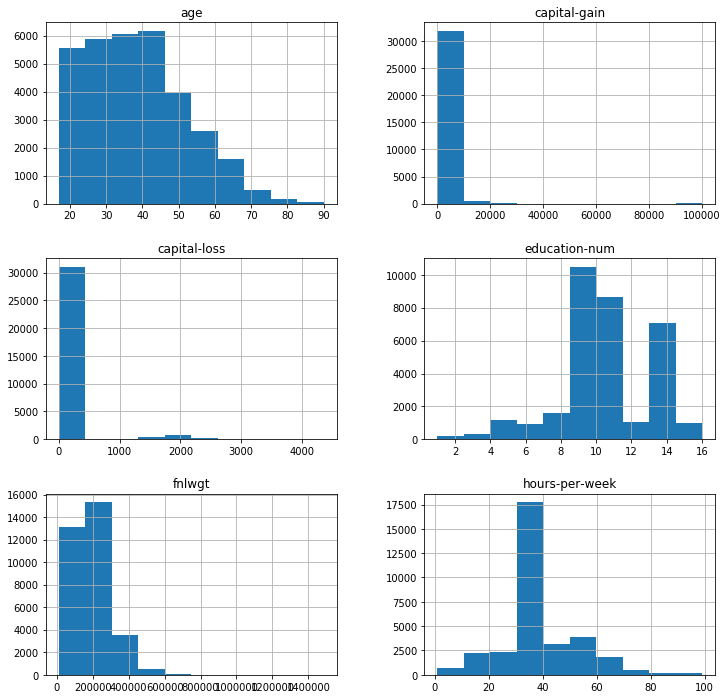

In [ ]:
# Visualize the most important or interesting attributes using appropriate techniques.
# For each visualization, provide an interpretation explaining why it is appropriate or interesting.
# What does each visualization tell us?

# Plotting histogram for numerical values
numerical_attributes = data.select_dtypes(include=['int'])

numerical_attributes.hist(figsize=(12,12))

The visualization of the numerical attributes give us a few interesting insights on the distribution of values.

1. Most of the individuals have an age < 50 while the maximum age is around 90.
2. In general, people do not have investments other than their regular income. However, there are very few people who invest, and there are also a small number of outliers who earn more than 90000 via capital gains. However, among the people who had a, capital loss the average loss looks to be around 2000.
3. On average, most of the people have studied till education number 9 or 10 in the areas where the census was taken.
4. Most of the people work around 40 hrs per week. However there are a few who don't work and a few who work for almost 100 hours a week.

For categorical attributes, we can view the count plot to see their frequency distributions.

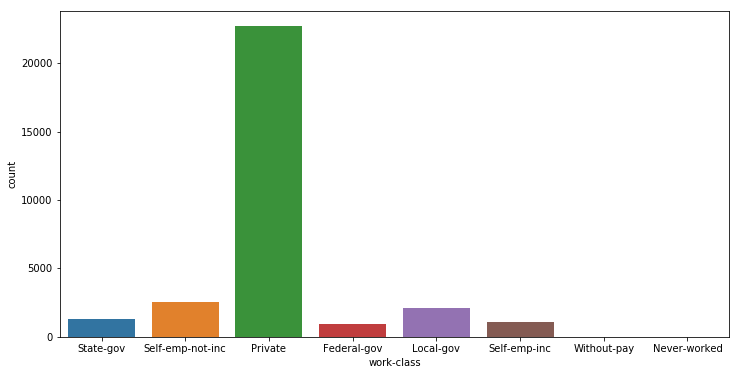

In [ ]:
# Plotting count plot for categorical values
categorical_attributes = data.select_dtypes(include=['object'])

# Work-class Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")

We can see that most of the people work in private sectors, and the rest are evenly distributed among state-gov, federal-gov, local-gov, self-emp-inc and self-emp-not-inc.

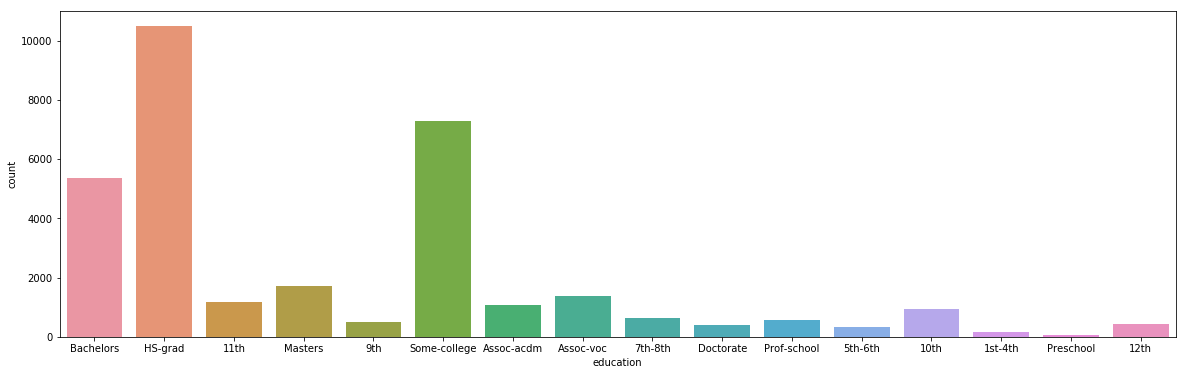

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data = categorical_attributes, x = "education")

Most of the people are high-school grads or have studied in some college. This is same as the education-num attribute, just that each of these values have been assigned a number there. We can use one of the two columns for our model, and ignore the other

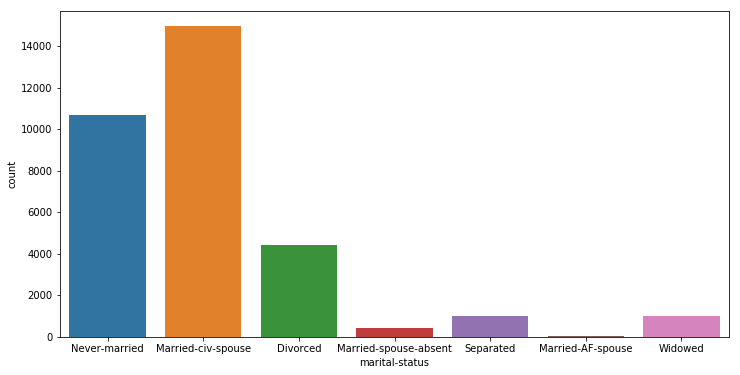

In [ ]:
# Marital-Status Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "marital-status")

Most of the people are either married civilians or are never married.

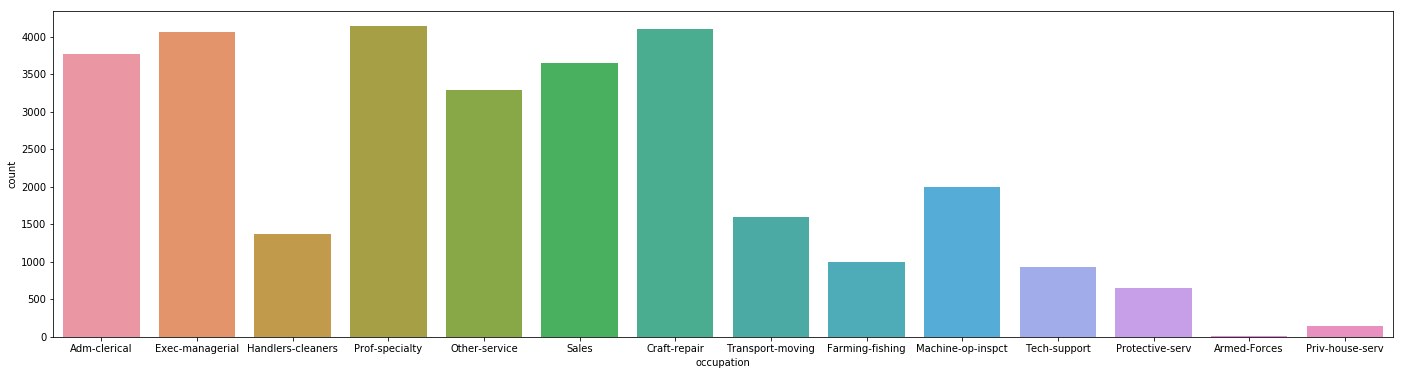

In [ ]:
# Occupation Count plot
plt.figure(figsize=(24,6))
sns.countplot(data = categorical_attributes, x = "occupation")

The jobs/occupation of the individuals are evenly distributed among a lot of values, like clerical administrator, executive managerial posts, professional speciality, sales, craft-repair and other-services.

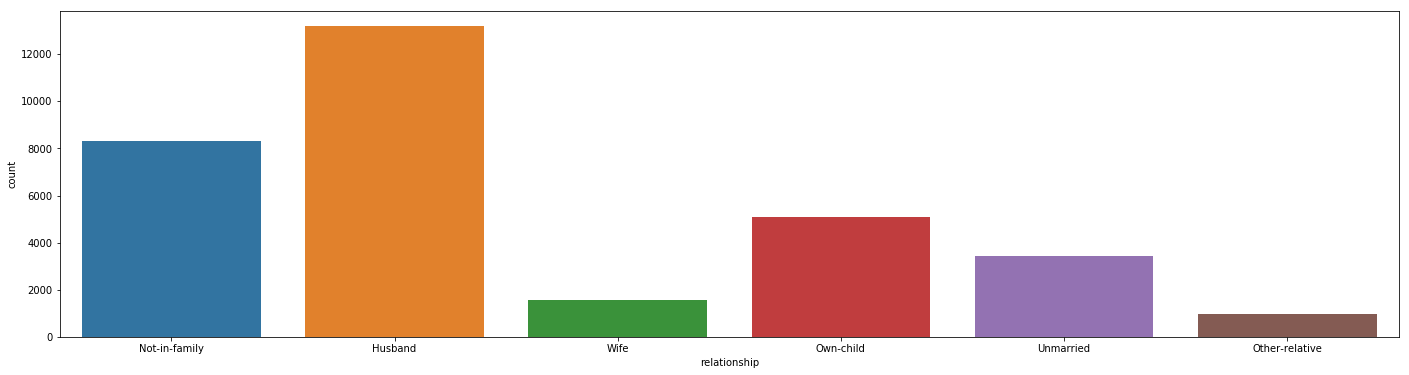

In [ ]:
# Relationship Count plot
plt.figure(figsize=(24,6))
sns.countplot(data = categorical_attributes, x = "relationship")

Most of the people in the survey are husbands, while a few are people who are not in family.

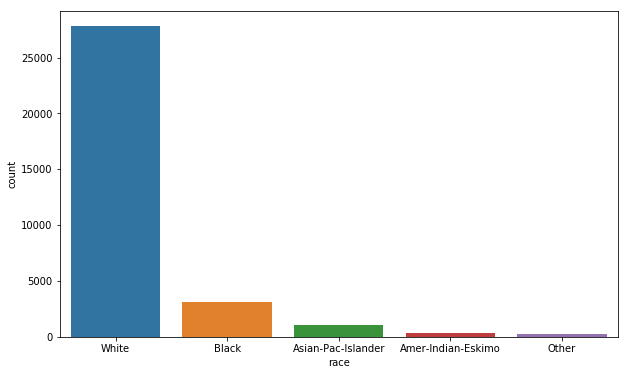

In [ ]:
# Race Count plot
plt.figure(figsize=(10,6))
sns.countplot(data = categorical_attributes, x = "race")

There's a huge number of white people in the data, while there are considerable amount of black people. The others are in very few numbers.

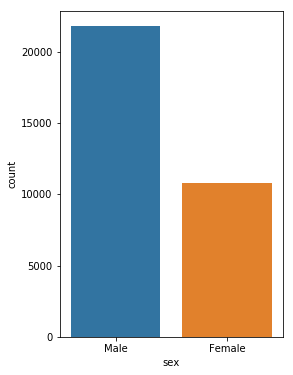

In [ ]:
# Sex Count plot
plt.figure(figsize=(4,6))
sns.countplot(data = categorical_attributes, x = "sex")

Majority of the population in the data are husbands, which is true according to the column relationship also, as the majority were husbands.

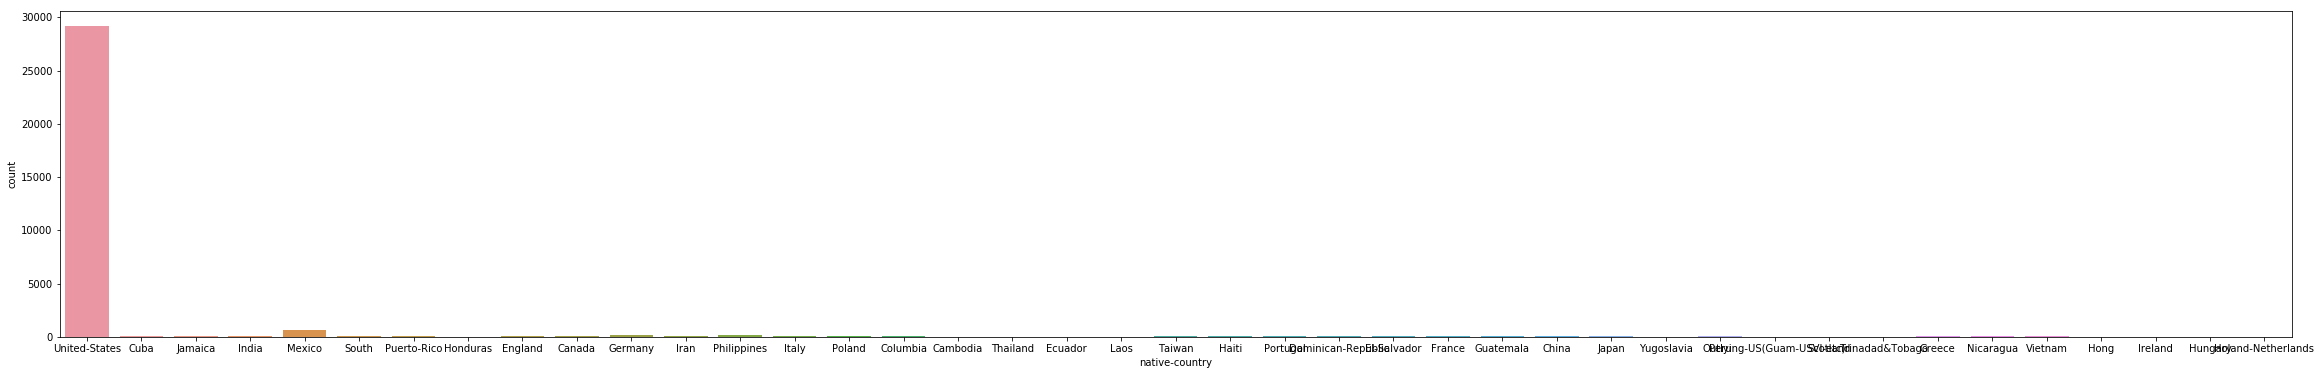

In [ ]:
# Native-Country Count plot
plt.figure(figsize=(40,6))
sns.countplot(data = categorical_attributes, x = "native-country")

Majority of the people are from United States, however there are a few from Mexico, and very few from India, Jamaica, Cuba, Germany, etc.

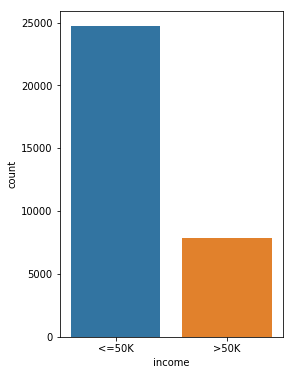

In [ ]:
# Income Count plot
plt.figure(figsize=(4,6))
sns.countplot(data = categorical_attributes, x = "income")

Majority of the people have an income of less than 50k according to the data given, indicating that the data is somewhat skewed.

# Data Quality

In [ ]:
#Verify data quality: explain any missing values, duplicate data, or outliers.
#What, if anything, do you need to do about these? Be specific.

#Check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work-class        30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
print("Missing value count occupation: ", data['occupation'].isnull().sum())
print("Missing value count work-class: ", data['work-class'].isnull().sum())
print("Missing value count native-country: ", data['native-country'].isnull().sum())

Missing value count occupation:  1843
Missing value count work-class:  1836
Missing value count native-country:  583


From the above table, we can see that there are 32561 entries in the dataframe. Only 3 attributes, namely work-class, occupation, native-country have some missing/null values as there is no data regarding them or people refused to give that specific information.

There are a lot of ways in which we can handle missing data. As all the three are categorical data, we would be talking only about handling categorical data here.
1. Drop these rows, so that we don't have any missing values in our data.
2. Choose the median of values once we have transformed categorical values into corresponding numerical representations, as median is not affected by the range/spread of data unlike mean.
3. We could also use a classifier with non-missing values to predict the missing values, and then use them to build our final model.
3. There are certain classifiers like XGBoost which automatically handle missing data, but we won't assume that here.

We could drop these values as there are not in a huge number here(~10% of the data). However, if our dataset is really small, we could consider the option 2, like incase of native-country, we could consider USA as the native country as more than 90% of the people in the dataset are from USA.  

We will also drop any duplicates present in the data, as these could lead to overfitting.

The histogram plots shown above indicate there are outliers in the attribute Capital-Gain. We can ignore/drop these outliers in order to get good results.

# Data Relationships

To explore the relationships among various attributes, we can look at scatter plots and correlation heatmaps among the different attributes.

We will plot pair plot to explore the pairwise relationship among attributes. Also, since we have already we have already seen histograms, we will use kde(Kernel density estimation) plot which shows the shape of the distribution as the diagonal plots.

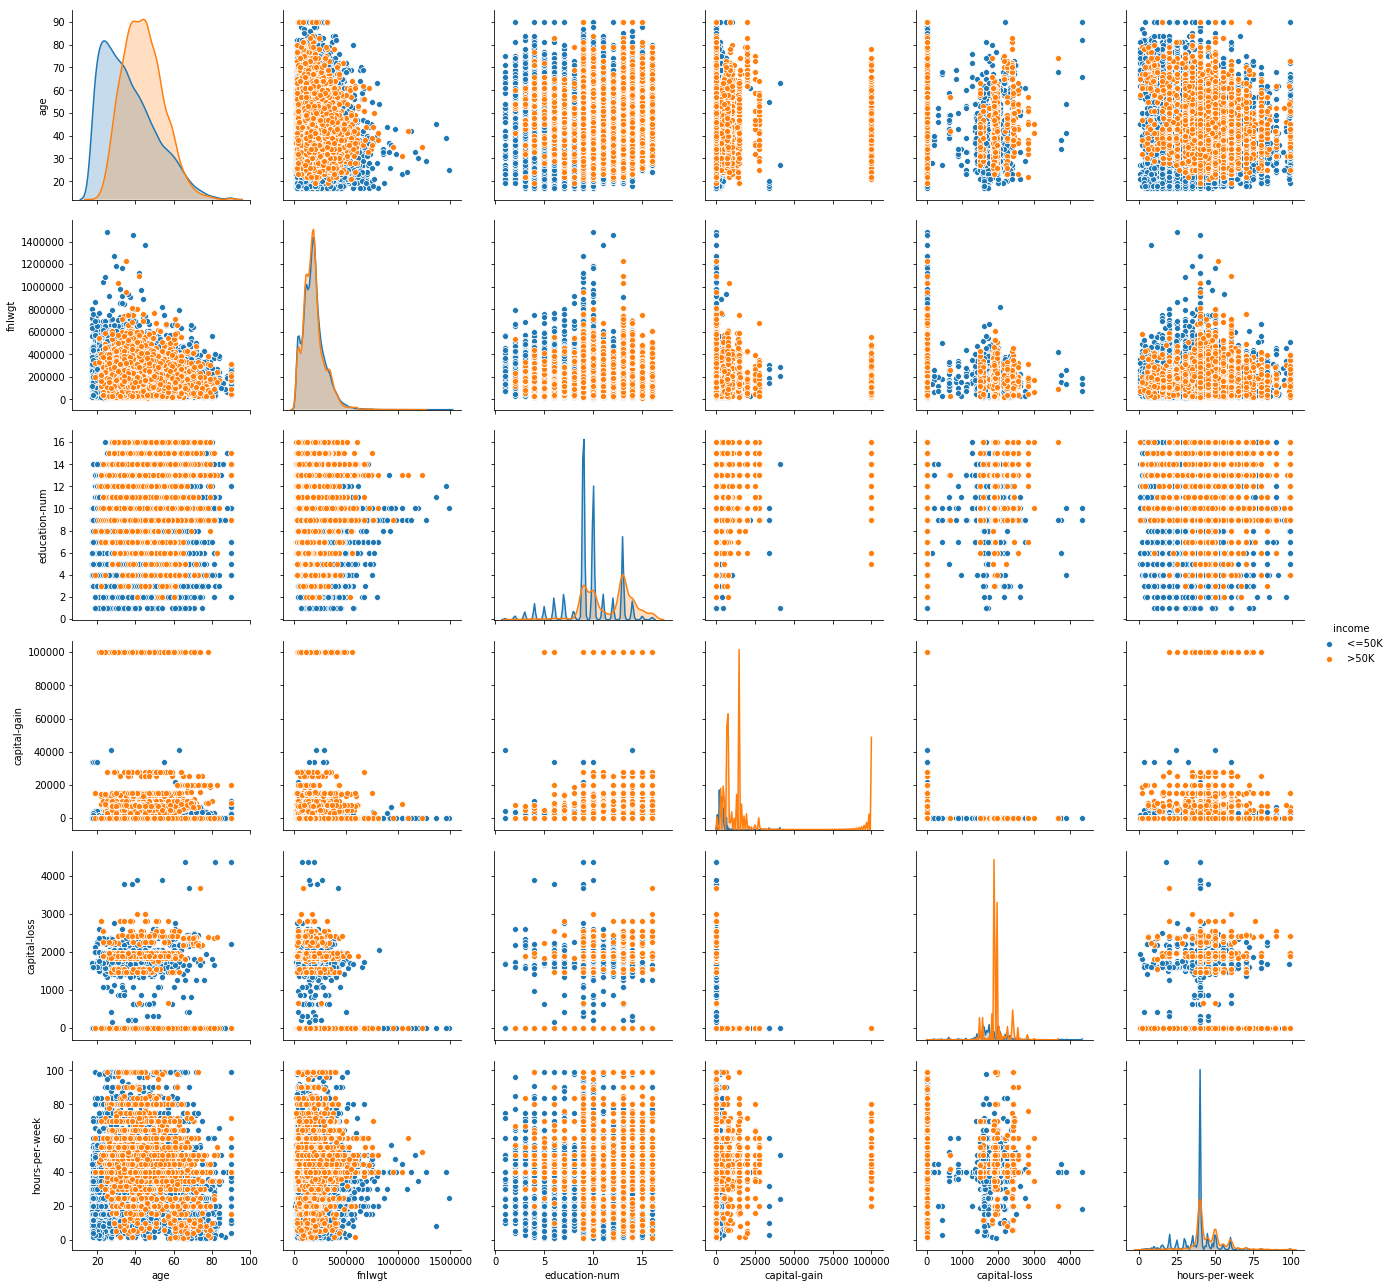

In [ ]:
# Explore the relationships among the attributes, excluding the class attribute.
# Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques.
# Explain and interpret any interesting relationships

sns.pairplot(data, height=3, diag_kind = 'kde', hue='income')

We will also plot the correlation heatmap to better understand the relationship among attributes.

Text(0.5,1.05,'Pearson Correlation of Features')

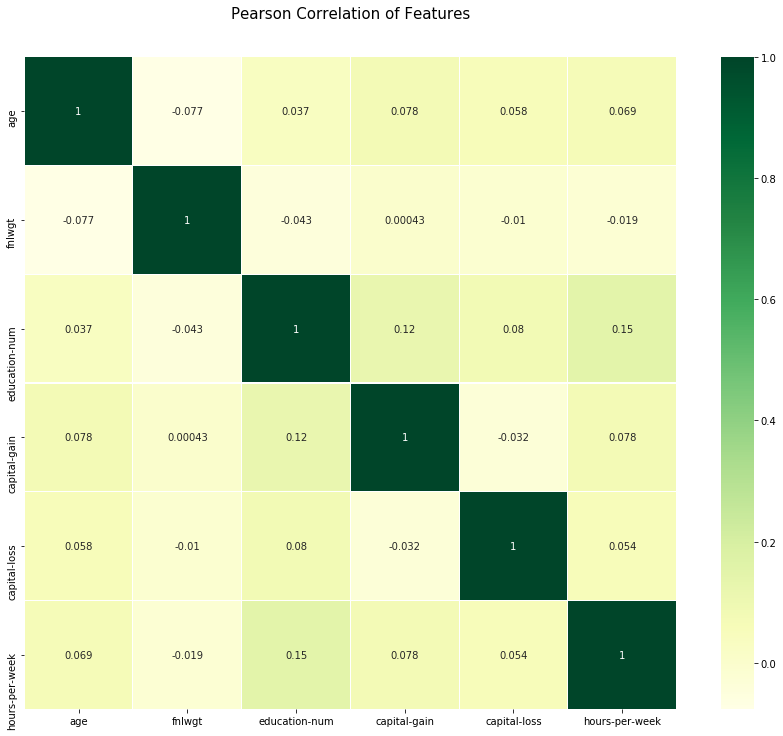

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

There isn't a great correlation between the numerical features.

1. The fnlwgt feature looks useless.
2. There is some correlation between age, hours per week and education-num according to both pair plot and correlation heatmap.
3. Capital gain and Capital loss don't anticorrelate a lot, which says people can invest only if they have money.

Let's look at a few relationships among categorical attributes.

In [ ]:
# Cross tabulation between work-class and sex

pd.crosstab(data['work-class'],data['sex'], margins=True)

sex               Female   Male    All
work-class                            
Federal-gov          315    645    960
Local-gov            835   1258   2093
Never-worked           2      5      7
Private             7752  14944  22696
Self-emp-inc         135    981   1116
Self-emp-not-inc     399   2142   2541
State-gov            489    809   1298
Without-pay            5      9     14
All                 9932  20793  30725

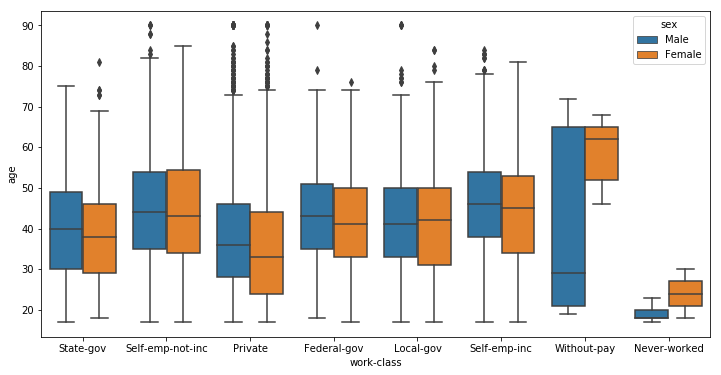

In [ ]:
# Box plot between work-class and age for different sex

plt.figure(figsize=(12,6))
sns.boxplot(x="work-class",y="age", hue="sex", data=data)

The cross tabulation values show that more number of men are self employed rather than women. The box plot gives a few interesting observations:
1. People who have never worked have a very young age. Women have a slightly higher median age than men for this working-class.
2. Men who work without pay have a median age of around 20-30, whereas women who work without pay have a median age of around 60-65.
3. Most of the working class have a median age of around 40-50.

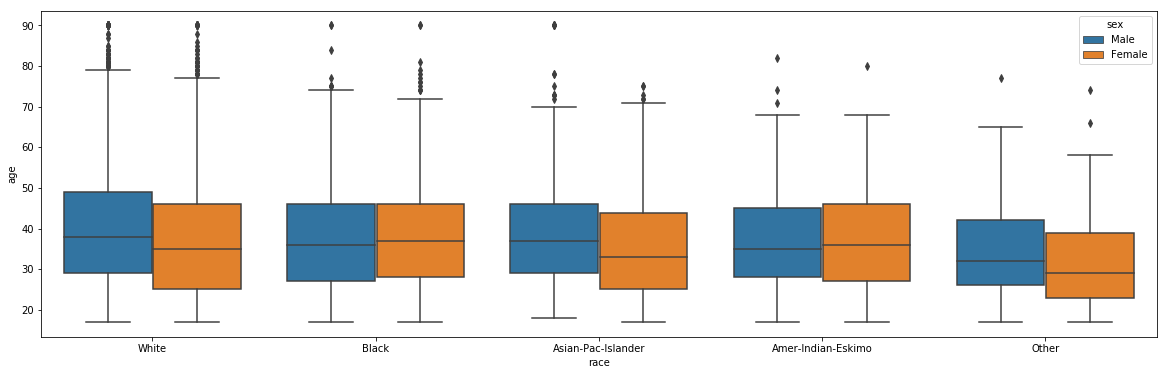

In [ ]:
# Box plot between race and age for different sex

plt.figure(figsize=(20,6))
sns.boxplot(x="race",y="age", hue="sex", data=data)

People from "other" race have a younger median age than the rest of the races.

In [ ]:
# Cross tabulation between race and sex

pd.crosstab(data['race'],data['sex'], margins=True)

sex                 Female   Male    All
race                                    
Amer-Indian-Eskimo     119    192    311
Asian-Pac-Islander     346    693   1039
Black                 1555   1569   3124
Other                  109    162    271
White                 8642  19174  27816
All                  10771  21790  32561

This above cross-tabulation gives a distribution of various races and sex. The number of males and females are very similar in all races except whites.

In [ ]:
# Cross tabulation between native-country and sex

pd.crosstab(data['native-country'],data['sex'], margins=True)

sex                         Female   Male    All
native-country                                  
Cambodia                         3     16     19
Canada                          39     82    121
China                           21     54     75
Columbia                        24     35     59
Cuba                            40     55     95
Dominican-Republic              35     35     70
Ecuador                          9     19     28
El-Salvador                     35     71    106
England                         32     58     90
France                          12     17     29
Germany                         60     77    137
Greece                           5     24     29
Guatemala                       20     44     64
Haiti                           20     24     44
Holand-Netherlands               1      0      1
Honduras                         7      6     13
Hong                             6     14     20
Hungary                          6      7     13
India                           11     89    100
Iran                             8     35     43
Ireland                          7     17     24
Italy                           21     52     73
Jamaica                         43     38     81
Japan                           20     42     62
Laos                             8     10     18
Mexico                         146    497    643
Nicaragua                       12     22     34
Outlying-US(Guam-USVI-etc)       7      7     14
Peru                            14     17     31
Philippines                     73    125    198
Poland                          19     41     60
Portugal                        12     25     37
Puerto-Rico                     52     62    114
Scotland                         5      7     12
South                           30     50     80
Taiwan                          15     36     51
Thailand                        11      7     18
Trinadad&Tobago                 11      8     19
United-States                 9682  19488  29170
Vietnam                         23     44     67
Yugoslavia                       3     13     16
All                          10608  21370  31978

We can see that the cross tabulation values don't give much interesting results when the number of categories are huge. We could reduce/combine the categories, like native-country to Non-USA, USA, group ages to specific ranges, etc.

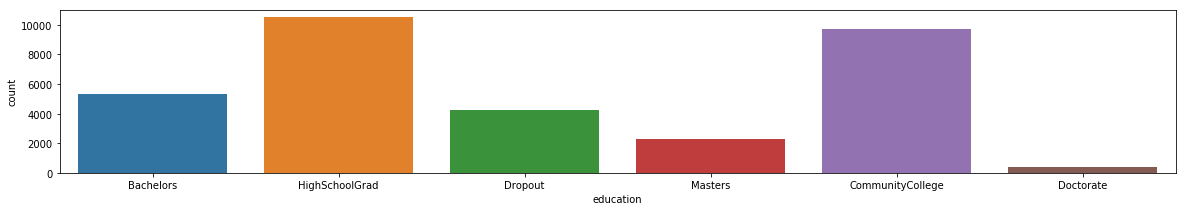

In [ ]:
#Grouping education
data['education'].replace('Preschool', 'Dropout',inplace=True)
data['education'].replace('10th', 'Dropout',inplace=True)
data['education'].replace('11th', 'Dropout',inplace=True)
data['education'].replace('12th', 'Dropout',inplace=True)
data['education'].replace('1st-4th', 'Dropout',inplace=True)
data['education'].replace('5th-6th', 'Dropout',inplace=True)
data['education'].replace('7th-8th', 'Dropout',inplace=True)
data['education'].replace('9th', 'Dropout',inplace=True)
data['education'].replace('HS-Grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('HS-grad', 'HighSchoolGrad',inplace=True)
data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
data['education'].replace('Prof-school', 'Masters',inplace=True)

fig = plt.figure(figsize=(20,3))
sns.countplot(x="education", data=data)

In [ ]:
# Cross tabulation between education and sex

pd.crosstab(data['education'],data['sex'], margins=True)

sex               Female   Male    All
education                             
Bachelors           1619   3736   5355
CommunityCollege    3727   6013   9740
Doctorate             86    327    413
Dropout             1321   2932   4253
HighSchoolGrad      3390   7111  10501
Masters              628   1671   2299
All                10771  21790  32561

This gives a better idea about the relation between sex and education level. More men do Masters and Doctorate compared to women.

Let's try a similar combination for native-country as well.

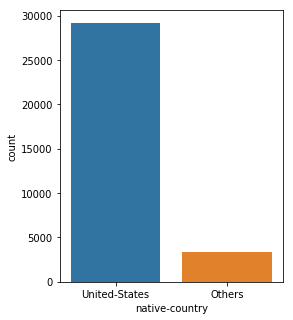

In [ ]:
# Grouping native-country
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")

# Plotting count plot for native-country
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=data)


In [ ]:
# Plotting cross tabulation values for native-country and sex
pd.crosstab(data['native-country'],data['sex'], margins=True)

sex             Female   Male    All
native-country                      
Others            1089   2302   3391
United-States     9682  19488  29170
All              10771  21790  32561

The ratio of men and women from US as well as other natives are more or less similar, however, the number of US natioanls are considerably more in the dataset.

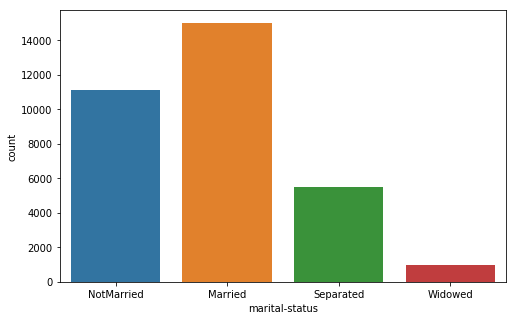

In [ ]:
# Grouping marital status
data['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
data['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
data['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
data['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
data['marital-status'].replace(['Separated'], 'Separated',inplace=True)
data['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
data['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

#Plotting count plot for marital status
fig = plt.figure(figsize=(8,5))
sns.countplot(x="marital-status", data=data)

In [ ]:
# Plotting cross tabulation values for marital status and sex
pd.crosstab(data['marital-status'],data['sex'], margins=True)

sex             Female   Male    All
marital-status                      
Married           1671  13328  14999
NotMarried        4972   6129  11101
Separated         3303   2165   5468
Widowed            825    168    993
All              10771  21790  32561

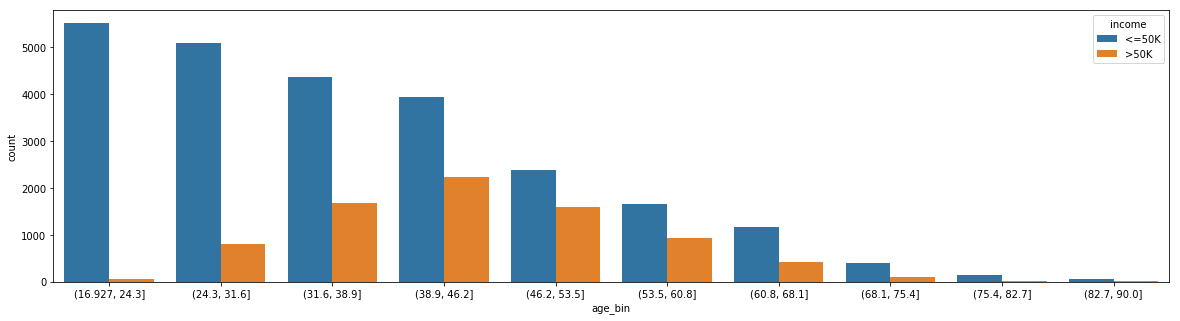

In [ ]:
#Identify and explain any interesting relationships between the class attribute and
#the other attributes. You may refer to earlier visualizations or create new ones.

# Dividing age into ranges
data['age_bin'] = pd.cut(data['age'], 10)

# Plotting count plot for age and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="age_bin", hue="income", data=data)

The above plot shows that experience matters to earn more income. More experienced people earn more than less experience people.

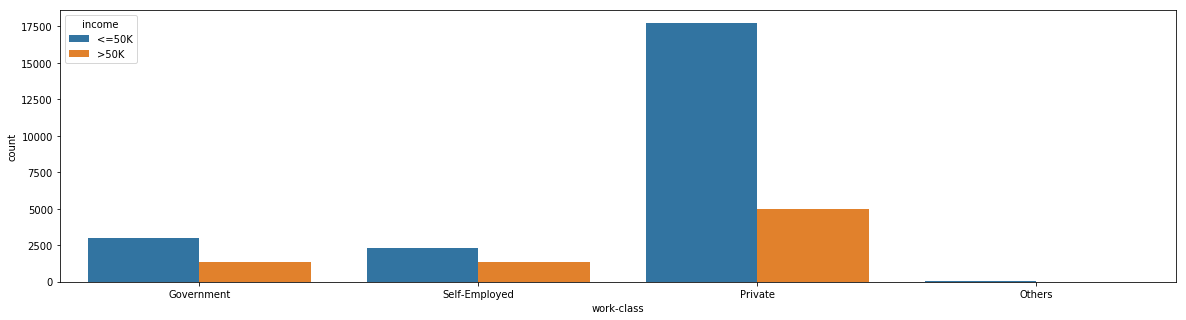

In [ ]:
#Grouping working class
data['work-class'].replace('State-gov', 'Government',inplace=True)
data['work-class'].replace('Self-emp-not-inc', 'Self-Employed',inplace=True)
data['work-class'].replace('Private', 'Private',inplace=True)
data['work-class'].replace('Federal-gov', 'Government',inplace=True)
data['work-class'].replace('Local-gov', 'Government',inplace=True)
data['work-class'].replace('Self-emp-inc', 'Self-Employed',inplace=True)
data['work-class'].replace('Without-pay', 'Others',inplace=True)
data['work-class'].replace('Never-worked', 'Others',inplace=True)

# Plotting count plot for working-class and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="work-class", hue="income", data=data)

The above plot shows that there's a better chance to earn more than 50k if the employee were self-employed.

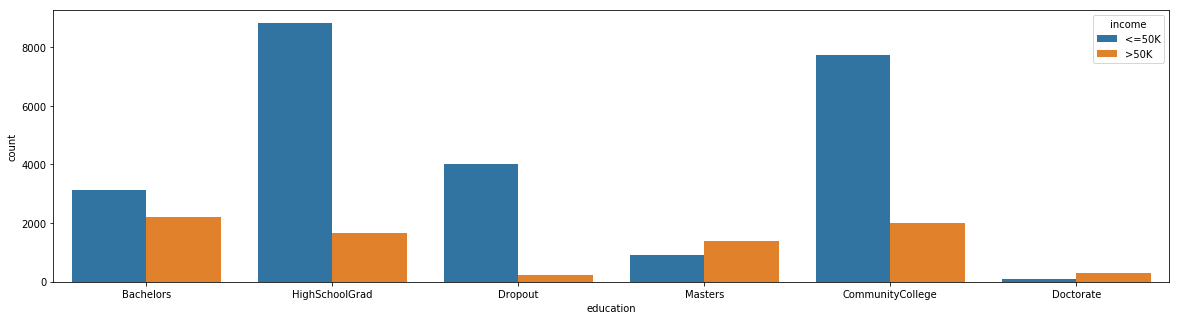

In [ ]:
# Plotting count plot for education and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="education", hue="income", data=data)

This result is more expected. Higher the education level, higher you earn. The above plot justifies that.

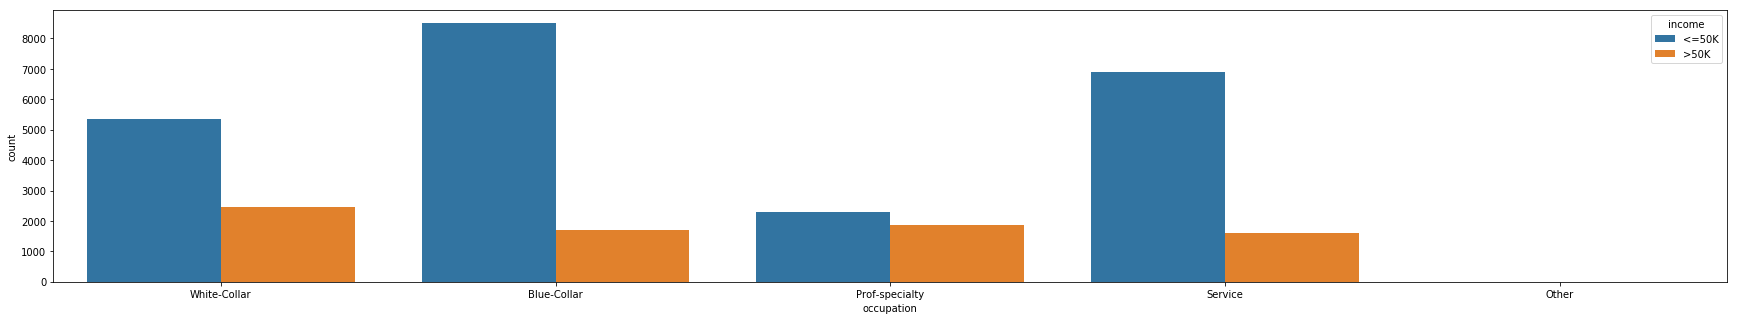

In [ ]:
# Grouping occupation
data['occupation'].replace('Adm-clerical', 'White-Collar',inplace=True)
data['occupation'].replace('Exec-managerial', 'White-Collar',inplace=True)
data['occupation'].replace('Handlers-cleaners', 'Blue-Collar',inplace=True)
data['occupation'].replace('Prof-speciality', 'Professional',inplace=True)
data['occupation'].replace('Other-service', 'Service',inplace=True)
data['occupation'].replace('Sales', 'Service',inplace=True)
data['occupation'].replace('Craft-repair', 'Blue-Collar',inplace=True)
data['occupation'].replace('Transport-moving', 'Blue-Collar',inplace=True)
data['occupation'].replace('Farming-fishing', 'Blue-Collar',inplace=True)
data['occupation'].replace('Machine-op-inspct', 'Blue-Collar',inplace=True)
data['occupation'].replace('Tech-support', 'Service',inplace=True)
data['occupation'].replace('Protective-serv', 'Service',inplace=True)
data['occupation'].replace('Armed-Forces', 'Other',inplace=True)
data['occupation'].replace('Priv-house-serv', 'Blue-Collar',inplace=True)

# Plotting count plot for occupation and income
fig = plt.figure(figsize=(30,5))
sns.countplot(x="occupation", hue="income", data=data)

People working White Collar and Prof-Specialtity positions earn more than other people.

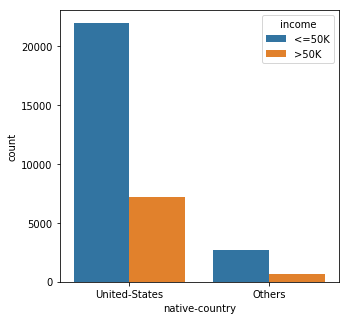

In [ ]:
# Plotting count plot for native-country and income
fig = plt.figure(figsize=(5,5))
sns.countplot(x="native-country", hue="income", data=data)

The ratio of people with native-country as US earning more than 50k is lesser than the ratio for people with other native-origins. This result is kind of surprising.

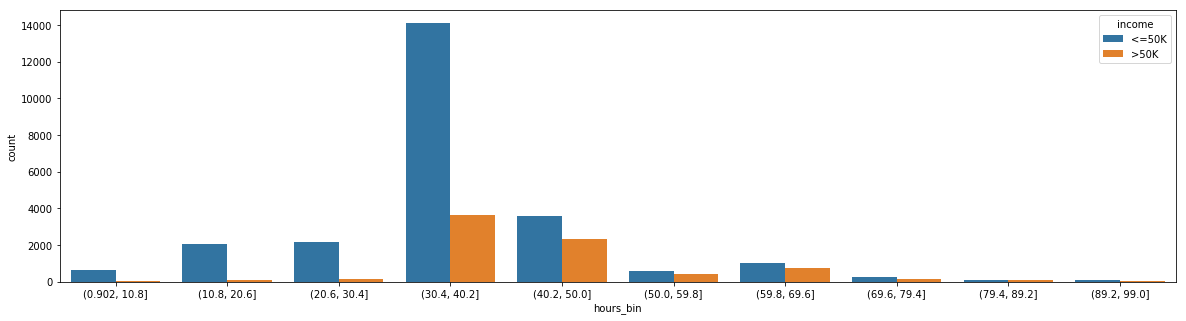

In [ ]:
#Dividing hours per week into range values
data['hours_bin'] = pd.cut(data['hours-per-week'], 10)

# Plotting count plot for hours per week range and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="hours_bin", hue="income", data=data)

People on average work 30-40 hours a week, but if the person works more, the probability of the person getting paid >50k increases.

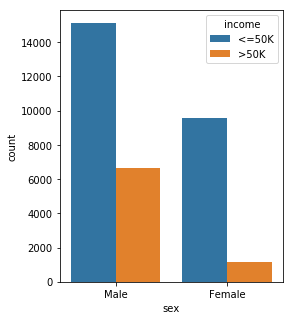

In [ ]:
# Plotting count plot for Sex and income
fig = plt.figure(figsize=(4,5))
sns.countplot(x="sex", hue="income", data=data)

The ratio of males earning more than 50k is greater than the ratio of females earning more than 50k.

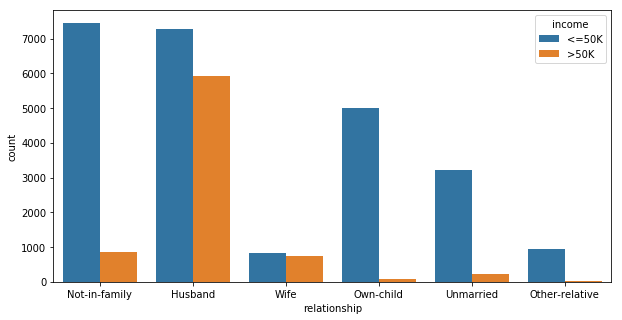

In [ ]:
# Plotting count plot for relationship and income
fig = plt.figure(figsize=(10,5))
sns.countplot(x="relationship", hue="income", data=data)

Husbands and Wives have more probability to earn money >50k than others.

# Data Processing

What attributes do you decide to keep or remove? Please justify.

1. education-num - This attribute is same as education column, so we can use just one of those two.
2. fnlwgt - This attribute is useless, as it doesn't have any correlation with any attribute. We will remove this attribute.
3. capital-gain and capital-loss - We can sum up capital gain and loss to have a column "Net-Capital-Gain" rather than having two columns representing different values.
4. education - We could divide this into different classes like described above(Dropout, HighSchoolGrad, Community college, Bachelors, Masters, Doctorate). This gives us more solid categories, which could have more impact on prediction of the income.
5. marital-status - Similar to education, we could just have 4 classes like NotMarried, Married, Seperated and Widowed to categorize this attribute.
6. race - Remain as it is.
7. occupation - Similar to education, we could just have 5 classes like Blue-Collar jobs, White-Collar jobs, service jobs, professional-speciality jobs, others.
8. working-class -  Similar to education, we could just have 4 classes like Government, Private, Self-employed, others.
9. Sex - Remain as it is.
10. Hours-per-week - Remain as it is.
11. Income - Remain as it is.
12. Native-Country - Similar to education, we could just have 2 classes namely USA and others.

We will drop the missing values, and the outliers.

In [ ]:
# Dropping missing values
data = data.dropna()
# Dropping duplicate values
data = data.drop_duplicates()
# Dropping outlier
i = data[data['capital-gain'] > 80000].index
data = data.drop(i)
# Dropping the column fnlwgt
data = data.drop(columns='fnlwgt')
# Combining capital-gain and capital-loss into 1 column
data['netcapitalgain'] = data.apply(lambda x: x['capital-gain'] + x['capital-loss'], axis=1)
data = data.drop(columns='capital-gain')
data = data.drop(columns='capital-loss')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30523 entries, 0 to 32560
Data columns (total 15 columns):
age               30523 non-null int64
work-class        30523 non-null object
education         30523 non-null object
education-num     30523 non-null int64
marital-status    30523 non-null object
occupation        30523 non-null object
relationship      30523 non-null object
race              30523 non-null object
sex               30523 non-null object
hours-per-week    30523 non-null int64
native-country    30523 non-null object
income            30523 non-null object
age_bin           30523 non-null category
hours_bin         30523 non-null category
netcapitalgain    30523 non-null int64
dtypes: category(2), int64(4), object(9)
memory usage: 3.3+ MB


In [ ]:
data.describe()

age  education-num  hours-per-week  netcapitalgain
count  30523.000000   30523.000000    30523.000000    30523.000000
mean      38.411657      10.117387       40.908200      694.772663
std       13.114620       2.554077       11.966325     2591.738766
min       17.000000       1.000000        1.000000        0.000000
25%       28.000000       9.000000       40.000000        0.000000
50%       37.000000      10.000000       40.000000        0.000000
75%       47.000000      13.000000       45.000000        0.000000
max       90.000000      16.000000       99.000000    41310.000000

Text(0.5,1.05,'Pearson Correlation of Features')

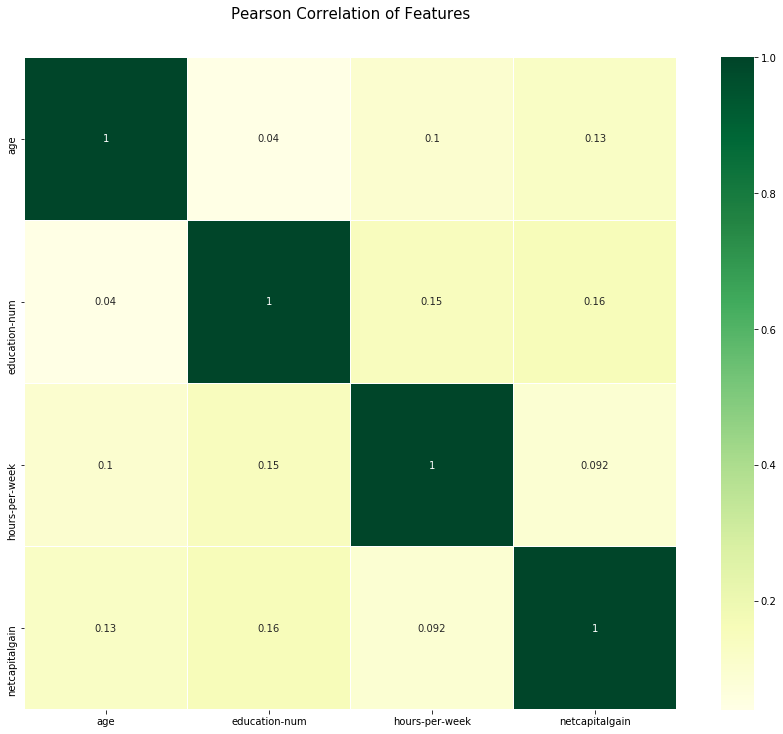

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

We can see that the attributes have better correlation than before now. The visualizations and interpretations of the changed categorical attributes have already been shown for the previous part.